Build a regression model.

In [2]:
import pandas as pd
import statsmodels.api as sm

# Load the datasets
df_all_foursquare = pd.read_csv("C:\\Users\\wamm1\\Desktop\\P3-Statistical-Modelling-Project\\data\\df_all_foursquare.csv")
df_all_yelp = pd.read_csv("C:\\Users\\wamm1\\Desktop\\P3-Statistical-Modelling-Project\\data\\df_all_yelp.csv")
df_bikes = pd.read_csv("C:\\Users\\wamm1\\Desktop\\P3-Statistical-Modelling-Project\\data\\df_bikes.csv")

# Merge the dataframes based on bike_latitude and bike_longitude
merged_foursquare = pd.merge(df_bikes, df_all_foursquare, on=['bike_latitude', 'bike_longitude'], how='left')
merged_yelp = pd.merge(df_bikes, df_all_yelp, on=['bike_latitude', 'bike_longitude'], how='left')

# Generate features
foursquare_features = merged_foursquare.groupby(['bike_latitude', 'bike_longitude']).agg(
    foursquare_pois_count=('name', 'count')
).reset_index()

yelp_features = merged_yelp.groupby(['bike_latitude', 'bike_longitude']).agg(
    yelp_pois_count=('name', 'count'),
    avg_rating=('rating', 'mean'),
    total_reviews=('review_count', 'sum')
).reset_index()

# Merge the features with the original bike data
final_df = pd.merge(df_bikes, foursquare_features, on=['bike_latitude', 'bike_longitude'], how='left')
final_df = pd.merge(final_df, yelp_features, on=['bike_latitude', 'bike_longitude'], how='left')


final_df.fillna(0, inplace=True)

# Regression Model
X = final_df[['foursquare_pois_count', 'yelp_pois_count', 'avg_rating', 'total_reviews']]
X = sm.add_constant(X)  # Add a constant (intercept term) to the predictors
y = final_df['free_bikes']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.099
Date:                Fri, 08 Sep 2023   Prob (F-statistic):             0.0991
Time:                        23:45:49   Log-Likelihood:                -2327.1
No. Observations:                 696   AIC:                             4662.
Df Residuals:                     692   BIC:                             4680.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.16

Provide model output and an interpretation of the results. 

Coefficients:

    const (Intercept): 8.7489
    foursquare_pois_count: 2.3871
    yelp_pois_count: 2.3871
    avg_rating: -3.9973
    total_reviews: -0.0011

Interpretation:

    foursquare_pois_count and yelp_pois_count: For each additional POI from either Foursquare or Yelp, we expect an increase of approximately 2.3871 bikes on average, holding all other variables constant. However, the high p-values (0.776) suggest these variables are not statistically significant predictors of free_bikes.

    avg_rating: For each unit increase in the average rating, the number of free bikes decreases by around 4, holding all other variables constant. This is a bit counterintuitive, but the high p-value (0.856) indicates that this variable is not a statistically significant predictor.

    The model's R-squared value is extremely low, indicating that our model doesn't explain much of the variance in the number of free bikes.

MODEL TESTING

Historgrams

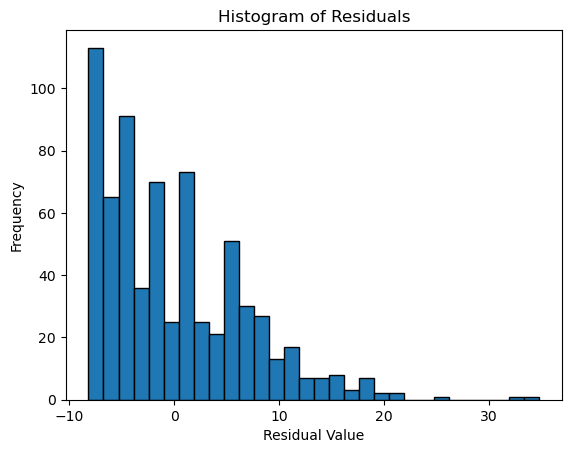

In [3]:
import matplotlib.pyplot as plt
residuals = model.resid
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()


# Stretch

How can you turn the regression model into a classification model?